In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt



In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement= Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#session.query(Measurement).fetchall()
engine.execute('SELECT max(date) FROM Measurement LIMIT 5').fetchall()


[('2017-08-23',)]

In [10]:
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
####see activity 10.3_3
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
prcp= session.query(Measurement.date,Measurement.prcp ).\
    filter(Measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
conn = engine.connect()
prcp_df= pd.read_sql("SELECT date, prcp FROM Measurement where date > '2016-08-23'", conn)
prcp_df= prcp_df.set_index('date')

# Sort the dataframe by date
prcp_df=prcp_df.sort_values(by='date')

# prcpgroup_df=prcp_df.groupby('date').sum()
# prcpgroup_df


2016-08-23


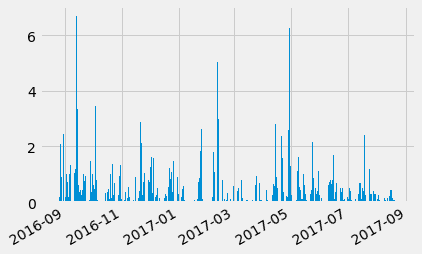

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data

# dates=prcp_df.index

# dates = pd.to_datetime(dates)
# line_status = prcp_df["prcp"]

# fig= plt.figure()
# ax1= fig.add_subplot(111)
# ax1.bar(dates, line_status,linewidth=100)
# fig.autofmt_xdate()
# #plt.gcf().autofmt_xdate()
# plt.show()

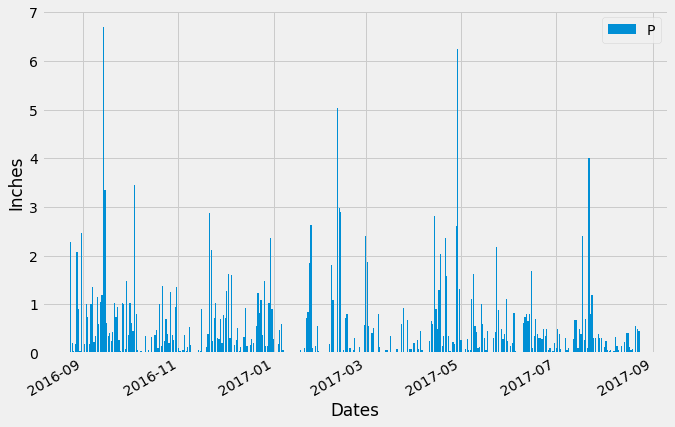

In [54]:
dates=prcp_df.index
dates = pd.to_datetime(dates)

percip = prcp_df["prcp"]

fig,ax1= plt.subplots(figsize=(10, 7))
ax1.bar(dates, percip)
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.legend("Percipitation",loc=0)
fig.autofmt_xdate()
#plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

# station_df=pd.read_sql('select count(*)\
#     from Station',conn)
# station_df

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
df=pd.read_sql('select station as Station, count(*) as Count\
                    from measurement\
                    group by station\
                    order by count desc',conn)

# List the stations and the counts in descending order.
df

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.count(Measurement.tobs),
       func.avg(Measurement.tobs)]
avg = session.query(*sel).filter(Measurement.station=='USC00519281').all()
avg

[(54.0, 85.0, 2772, 71.66378066378067)]

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df= pd.read_sql("SELECT date, tobs FROM Measurement where date > '2016-08-23'and station='USC00519281'", conn)
temp_df

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


Text(0.5, 0, 'Temperature')

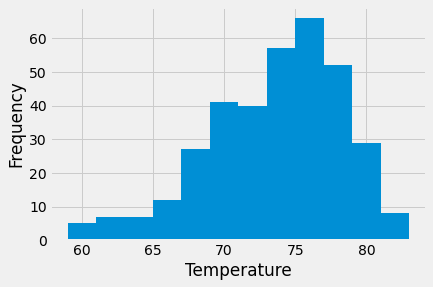

In [56]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
graph=temp_df['tobs'].plot(kind='hist',bins=12)
graph.set_xlabel("Temperature")

# Close session

In [57]:
# Close Session
session.close()